# Initial Analysis

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [27]:
df = pd.read_csv("data/cardio_train.csv",sep=";")

In [28]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  988  22469       1     155    69.0    130     80            2     2      0   
1  989  14648       1     163    71.0    110     70            1     1      0   
2  990  21901       1     165    70.0    120     80            1     1      0   
3  991  14549       2     165    85.0    120     80            1     1      1   
4  992  23393       1     155    62.0    120     80            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       1       0  
3     1       1       0  
4     0       1       0

## Univariate Analysis

In [29]:
# All features are integer except weight which is float type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Data Description :
3 Types of input features

1. Information like age, gender, height, weight
2. Test values like systolic and diastolic BP, cholesterol, glucose
3. Physical check information like smoking, alcohol intake, activity

Target is binary cardio chances or not

In [30]:
df.describe()

id           age        gender        height        weight  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean   50471.480397  19468.786280      1.349519    164.362217     74.203027   
std    28563.100347   2467.261818      0.476821      8.205337     14.383469   
min      988.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25745.000000  17664.000000      1.000000    159.000000     65.000000   
50%    50494.000000  19704.000000      1.000000    165.000000     72.000000   
75%    75150.000000  21326.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean     128.829584     96.650092      1.366806      1.226447      0.088051   
std      154.775805    189.096240      0.680270      0.572246      0.283371   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69301.000000  69301.000000  69301.000000  
mean       0.053881      0.803986      0.499589  
std        0.225784      0.396982      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

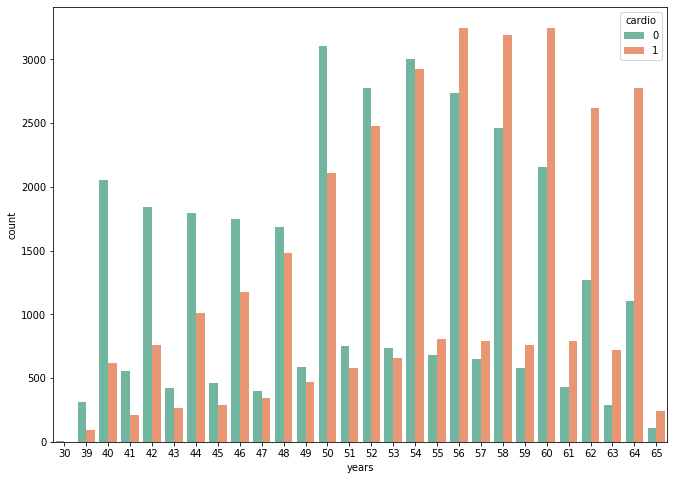

In [31]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");
# It looks like people above 55 are more prone cardio vascular disease

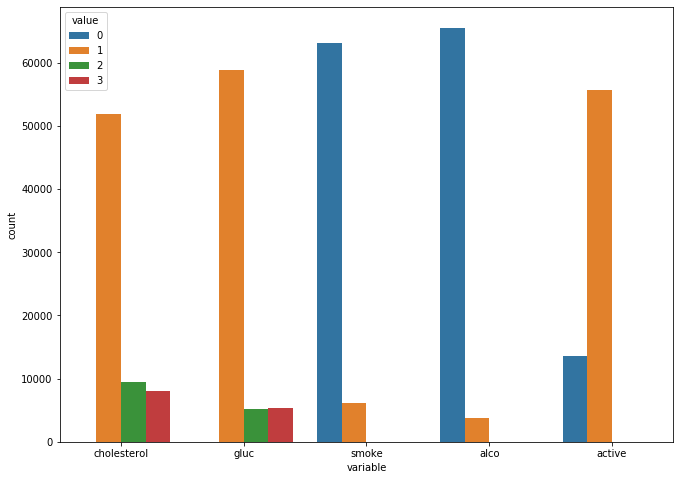

In [32]:
# Let's check the categorical variables and their distribution
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

## Bivariate Analysis

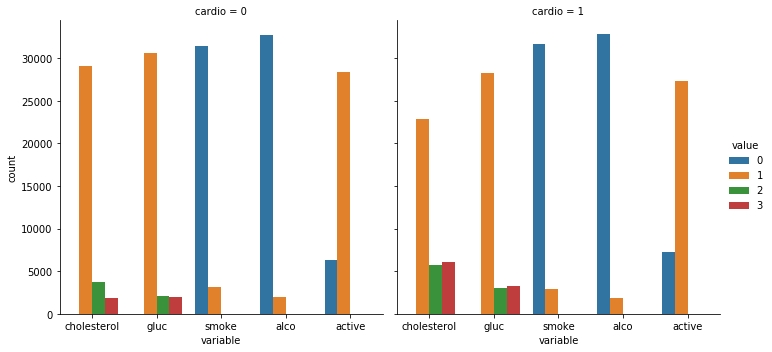

In [33]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

## Gender wise analysis

In [34]:
df.groupby('gender')['height'].mean()

gender
1    161.358659
2    169.952068
Name: height, dtype: float64

In [35]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [36]:
# Men consume more alcohol than female
df.groupby('gender')['alco'].sum()

gender
1    1153
2    2581
Name: alco, dtype: int64

In [37]:
# To see how the target class is distributed among different genders
df['cardio'].value_counts(normalize=True)

0    0.500411
1    0.499589
Name: cardio, dtype: float64

In [38]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender         1         2
cardio                    
0       0.327557  0.172855
1       0.322925  0.176664

# Data Cleanup

In [39]:
df.isnull().values.any()

False

In [40]:
# Dropping the id column as it is not a feature
df.drop("id",axis=1,inplace=True)

In [41]:
df.describe()

age        gender        height        weight         ap_hi  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean   19468.786280      1.349519    164.362217     74.203027    128.829584   
std     2467.261818      0.476821      8.205337     14.383469    154.775805   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19704.000000      1.000000    165.000000     72.000000    120.000000   
75%    21326.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean      96.650092      1.366806      1.226447      0.088051      0.053881   
std      189.096240      0.680270      0.572246      0.283371      0.225784   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio         years  
count  69301.000000  69301.000000  69301.000000  
mean       0.803986      0.499589     53.338177  
std        0.396982      0.500003      6.765427  
min        0.000000      0.000000     30.000000  
25%        1.000000      0.000000     48.000000  
50%        1.000000      0.000000     54.000000  
75%        1.000000      1.000000     58.000000  
max        1.000000      1.000000     65.000000

In [43]:
# Drop duplicates
df.drop_duplicates(inplace=True)
len(df)

69277

In [45]:
# Check BMI index
df["bmi"] = df["weight"] / (df["height"]/100)**2
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
df = df[~out_filter]
len(df)

68294

In [46]:
out_filter2 = ((df["ap_hi"] < 0) | (df["ap_lo"] < 0))
df = df[~out_filter2]
len(df)

68286

## Multivariate Analysis 

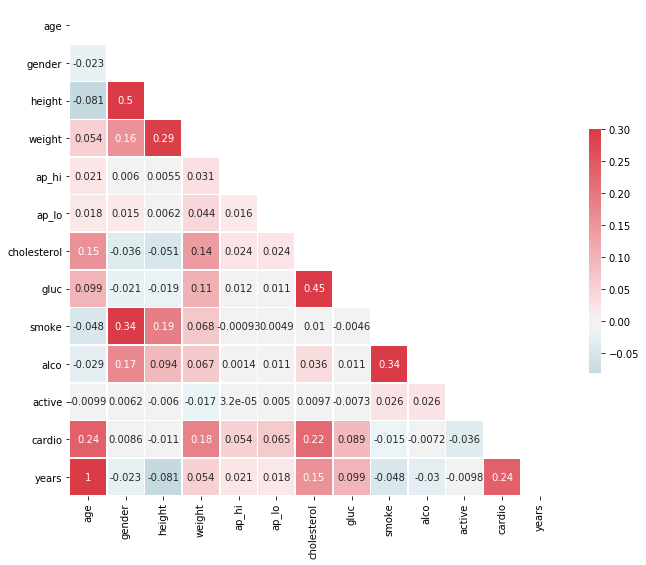

In [42]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [48]:
!pip install pandas_profiling

     |████████████████████████████████| 259 kB 293 kB/s eta 0:00:01
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 10.0 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 6.6 MB/s eta 0:00:01
Processing /Users/jayantparida/Library/Caches/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655/htmlmin-0.1.12-py3-none-any.whl
  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
     |████████████████████████████████| 59 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 599 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 6.7 MB/s eta 0:00:01     |█████████████████████▌          | 8.4 MB 6.7 MB/s eta 0:00:01     |███████████████████████████████▏| 12.1 MB 6.7 MB/s eta 0:00:01
Processing /Users/jayantparida/Library/Caches/pip/wheels/18/e0/b3/79594ba4a96afaf41d39916ed83ce7d5ec031874c66a76eabb/confuse-1.1.0-py3-none-any.whl
     |████████████████████████████████| 63

  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=c8817869acb1bf7d5cc38a3391dee799a5b63c0cd176bf92efc88da657aecb05
  Stored in directory: /Users/jayantparida/Library/Caches/pip/wheels/16/72/b0/e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built imagehash
ERROR: tensor2tensor 1.15.5 has requirement gym==0.14.0, but you'll have gym 0.15.7 which is incompatible.
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling 

In [50]:
import pandas_profiling as pp
pp.ProfileReport(df)